## Extra Problems -- Applied Linear Algebra

This document contains the computational component of exercises in Allaire and Kaber, _Numerical Linear Algebra_, Springer. The problems are intended to be done in MATLAB, but I choose to do them using Python. These extra problems are not assigned as homework for the course named above, and are purely for my practice with the computational aspect of numerical linear algebra. I tried these problems out as an exercise in preparation for the final exam and my answers may be subject to errors.

### Exercise 2.15
$$
P = \begin{bmatrix} 1 & 2 & 2 & 1 \\ 2 & 3 & 3 & 2\\ -1 & 1 & 2 & -2 \\ 1 & 3 & 2 & 1\end{bmatrix},\;\; D = \begin{bmatrix} 2 & 1 & 0 & 0\\ 0 & 2 & 1 & 0 \\ 0 & 0 & 3 & 0\\ 0 & 0 & 0 & 4\end{bmatrix}, \;\; A = PDP^{-1}
$$

1. $\sigma(A) = \sigma(D) = \{2, 3, 4\}$ ($\because D$: upper triangular)
2.

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from numba import njit

In [3]:
P = np.array([[1, 2, 2, 1], [2, 3, 3, 2], [-1, 1, 2, -2], [1, 3, 2, 1]])
D = np.array([[2, 1, 0, 0], [0, 2, 1, 0], [0, 0, 3, 0], [0, 0, 0, 4]])
A = P.dot(D.dot(la.inv(P)))

In [4]:
lam, U = la.eig(A)
lam

array([4.+0.00000000e+00j, 3.+0.00000000e+00j, 2.+1.65960863e-07j,
       2.-1.65960863e-07j])

I find that the function `eig` is subject to some machine precision and thus recognizes two separate values for the eigenvalue of 2.

In [5]:
la.matrix_power(A, 3)

array([[ 693., -307.,  -56., -127.],
       [1256., -568., -112., -216.],
       [-734.,  398.,  120.,   50.],
       [ 742., -326.,  -56., -138.]])

In [5]:
la.matrix_power(A, 10)

array([[  9231335.00000188,  -4475213.00000088,  -1047552.00000016,
         -1327437.00000031],
       [ 18112472.00000345,  -8833352.00000161,  -2095104.00000029,
         -2538824.00000056],
       [-16392202.00000272,   8259246.00000124,   2096128.00000023,
          1968814.00000043],
       [  9404386.00000201,  -4533238.00000093,  -1047552.00000017,
         -1384438.00000033]])

The machine precision errors get inflated as we take higher matrix powers. This is probably due to errors accumulating from each multiplication.

### Exercise 2.21

1.

In [6]:
def SymmetricMat(n):
    """
    returns a symmetric n\times n matrix
    """
    A_ = np.random.randn(n, n)
    A = A_ + A_.T
    
    return A

In [7]:
n = 5
A = SymmetricMat(n)
A

array([[ 2.13991674,  1.36084063, -0.97331958, -0.20948179, -0.15519334],
       [ 1.36084063, -0.1783174 , -1.55205954,  0.44404328, -1.68380325],
       [-0.97331958, -1.55205954,  0.43291873, -1.93496778,  0.52039052],
       [-0.20948179,  0.44404328, -1.93496778,  2.74160215,  1.83700503],
       [-0.15519334, -1.68380325,  0.52039052,  1.83700503,  0.37035364]])

In [8]:
lam, U = la.eig(A) # eigendecomposition of A

# Sum using decomposition
S = np.zeros(n)
for i in range(n):
    S = S + lam[i]*np.outer(U[:, i], U[:, i])
S

array([[ 2.13991674,  1.36084063, -0.97331958, -0.20948179, -0.15519334],
       [ 1.36084063, -0.1783174 , -1.55205954,  0.44404328, -1.68380325],
       [-0.97331958, -1.55205954,  0.43291873, -1.93496778,  0.52039052],
       [-0.20948179,  0.44404328, -1.93496778,  2.74160215,  1.83700503],
       [-0.15519334, -1.68380325,  0.52039052,  1.83700503,  0.37035364]])

In [9]:
la.norm(S - A) # check the norm of difference

6.9634419216236965e-15

$S$ is equivalent to $A$ up to machine precision.

2.

In [10]:
D = np.diag(lam)
D[0, 1] = 1
D

array([[ 4.50186036,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  3.80560903,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.1056723 ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -2.30331375,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1.60335408]])

In [11]:
B = U @ D @ U.T
mu, V = la.eig(B)

S2 = np.zeros(n)
for i in range(n):
    S2 = S2 + mu[i]*np.outer(V[:, i], V[:, i])
S2

array([[-1.88424341, -3.81346609, -0.59098895,  0.45099422,  0.98425252],
       [-3.81346609,  5.97222943, -0.22641825, -0.18647433, -1.90256606],
       [-0.59098895, -0.22641825,  1.16929196,  1.51333317, -1.18568612],
       [ 0.45099422, -0.18647433,  1.51333317, -1.8362864 , -1.13499942],
       [ 0.98425252, -1.90256606, -1.18568612, -1.13499942,  2.29349871]])

The matrix $B$ appears to be very slightly different from $A$. The values look similar but are off by a small amount. I now check the 2-norm of the difference.

In [12]:
la.norm(B - A, ord = 2)

0.9999999999999999

Here are some other norms.

In [13]:
print("Frobenius norm: {}".format(la.norm(B - A, ord = "fro")))
print("1-norm: {}".format(la.norm(B - A, ord = 1)))
print("Infinity norm: {}".format(la.norm(B - A, ord = np.inf)))

Frobenius norm: 0.9999999999999998
1-norm: 1.1331729635073913
Infinity norm: 1.6572504065929505


The difference in 2-norm between $B$ and $A$ are 1. I now justify this result. First, define
$$
E_{12} = (e_{ij}) = \begin{cases} 1 & i=1,j=2 \\ 0 & \text{otherwise}\end{cases}.
$$
Then, we can write $A = UDU^\top, B = U(D+E_{12})U^\top$. This gives
$$
\lVert B - A \rVert_2 = \lVert U(D+E_{12})U^\top - UDU^\top\rVert_2 = \lVert UE_{12}U^\top\rVert_2 = \lVert E_{12}\rVert_2 = 1,
$$
since $U$ is unitary.

Therefore, we have $\lVert B - A\rVert_2 = 1$.

### Exercise 2.23

1.

In [15]:
n = 5
A = np.random.randn(n, n)
lam, U = la.eig(A)
lam # spectrum

array([ 1.13543842,  0.53523625, -3.07739753, -1.98488579, -0.9448822 ])

In [16]:
max(abs(lam)) # spectral radius of A

3.0773975319616436

2. 

In [17]:
A

array([[ 0.83398591, -0.52278093,  0.8868695 , -1.25797755, -1.22115511],
       [-0.03385667, -0.59546792, -1.30801879, -1.26162425, -0.42912919],
       [ 2.64197445, -0.77925375, -1.45211983, -0.70251011,  0.3804059 ],
       [ 0.43960925, -0.41377582,  0.06989936, -1.31847039, -0.11599152],
       [ 0.26813113, -0.74085515,  1.37390446, -0.42839547, -1.80441861]])

In [18]:
gamma = []
for i in range(n):
    gamma.append(sum(abs(A[:, i])) - abs(A[i, i]))
    
gamma # calculated $\gamma_i$s

[3.3835715054031383,
 2.456665654292216,
 3.6386921092677222,
 3.650507379514934,
 2.1466817180952926]

In [19]:
D = []
for i in range(n):
    D.append((A[i,i] - gamma[i], A[i,i] + gamma[i]))
D

[(-2.5495855946424726, 4.217557416163804),
 (-3.0521335776599945, 1.8611977309244376),
 (-5.090811941029193, 2.1865722775062517),
 (-4.9689777703616205, 2.3320369886682473),
 (-3.9511003314553674, 0.3422631047352176)]

In [20]:
in_di = []
for i in range(n):
    for_lam = []
    for j in range(n):
        for_lam.append(abs(lam[i] - A[j, j]) <= gamma[j]) # check whether \lambda_i \in D_j
    
    in_di.append(max(for_lam))
in_di

[True, True, True, True, True]

I find that, indeed, the eigenvalues fall into at least one of the Gershgorin disk (Gershgorin theorem).

To prove this rigorously, let $\lambda\in\sigma(A)$ and $x\in\mathbb{R}^n$ be its corresponding eigenvector. Suppose $\lvert x_i\rvert \ge \lvert x_j\rvert, \forall j=1,\dots,n$ i.e., the $i$th element of $x$ has the largest modulus. Since we have $Ax = \lambda x$, looking at the $i$th element yields
$$
\sum_{j=1}^n a_{ij}x_j = \lambda x_i \Rightarrow \sum_{j\ne i} a_{ij}x_j = (\lambda - a_{ii})x_i
$$
Then, by triangle inequality,
$$
\lvert\lambda - a_{ii}\rvert = \left\lvert\sum_{j\ne i} a_{ij}\frac{x_j}{x_i}\right\rvert \le \sum_{j\ne i}\left\lvert a_{ij}\frac{x_j}{x_i}\right\rvert = \sum_{j\ne i} \lvert a_{ij}\rvert \left\lvert\frac{x_j}{x_i}\right\rvert \le \sum_{j\ne i} \lvert a_{ij}\rvert
$$

Therefore, for this particular $i$, we have $\lambda\in D_i$. Since $\lambda$ was arbitrary, we have the desired.

3.

In [21]:
def DiagDomMat(n):
    """
    returns a diagonally dominant matrix of size n\times n
    """
    A = np.random.randn(n, n)
    for i in range(n):
        A[i, i] = np.random.rand(1) + sum(abs(A[i, :])) - abs(A[i, i])
    
    return A

In [22]:
A = DiagDomMat(3)
A

array([[ 2.71498062,  1.68936973, -0.23156278],
       [-0.45721152,  1.12730861, -0.05158287],
       [ 1.15115462, -1.61038548,  2.87366852]])

In [23]:
la.det(A)

10.818990412811266

In [24]:
la.det(DiagDomMat(10))

460501452.37675214

In [25]:
la.det(DiagDomMat(2))

0.5313084286764557

In [26]:
la.det(DiagDomMat(3))

6.439479738485481

In [27]:
la.det(DiagDomMat(4))

73.9873022258113

I notice that all the determinants are strictly positive. This can be proved with the Gershgorin theorem above.

Suppose $A\in\mathcal{M}_n(\mathbb{R}^n)$ is diagonally dominant. Let $\lambda\in\sigma(A)$. Then, by Gershgorin theorem, we have $\lambda\in D_i$ for some Gershgorin disk $D_i$. This gives
$$
\lvert \lambda - a_{ii}\rvert \le \sum_{j\ne i}\lvert a_{ij}\rvert < \lvert a_{ii}\rvert.
$$
By triangle inequality, we have
$$
\left\lvert\lvert\lambda\rvert - \lvert a_{ii}\rvert\right\rvert \le \lvert \lambda - a_{ii}\rvert < \lvert a_{ii}\rvert \Rightarrow -\lvert a_{ii}\rvert < \lvert\lambda\rvert - \lvert a_{ii}\rvert < \lvert a_{ii}\rvert.
$$
Therefore, we have
$$
0 < \lvert \lambda\rvert < 2\lvert a_{ii}\rvert,
$$
which implies $\lambda \ne 0$.

### Exercise 3.8

In [28]:
n = 10
A = np.random.randn(n, n)
rho = max(abs(la.eig(A)[0]))
rho

2.9965717124228335

In [29]:
ks = np.linspace(10, 100, num = 10)
res = []
for k in ks:
    A_k = la.matrix_power(A, int(k))
    res.append(la.norm(A_k, ord = 2)**(1/k))
res

[3.171994189780434,
 3.084045731445063,
 3.054361165218563,
 3.039828496453234,
 3.031124788558357,
 3.0253383035411328,
 3.0212119531664925,
 3.018120871684719,
 3.015718888446027,
 3.013798678160939]

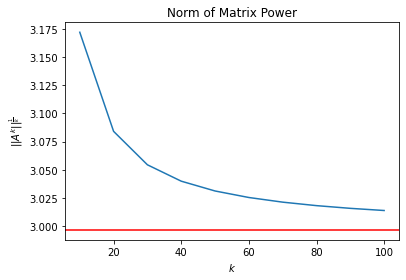

In [30]:
plt.plot(ks, res)
plt.axhline(rho, color = "red")
plt.title("Norm of Matrix Power")
plt.xlabel("$k$")
plt.ylabel("$||A^k||^\\frac{1}{k}$")
plt.show()

The plot seems to suggest that the value of the norm converges to $\rho(A)$ as $k\rightarrow\infty$.

Suppose $\lambda\in\sigma(A)$ s.t. $\lvert\lambda\rvert = \rho(A)$, i.e., the eigenvalue with the largest modulus.

Let $x\in\mathbb{R}^n$ be a corresponding eigenvector and $y\in\mathbb{R}^n$ be any vector. Then, by definition of a matrix norm, we have
$$
\lVert A^k xy^\top\rVert \le \lVert A^k\rVert \lVert xy^\top\rVert.
$$
Since $x$ is an eigenvector,
$$
\lVert A^k xy^\top\rVert = \lVert \lambda^k xy^\top\rVert = \lvert \lambda^k\rvert \lVert xy^\top\rVert \le \lVert A^k\rVert \lVert xy^\top\rVert
$$
$$
\Rightarrow \lvert\lambda\rvert^k = \lvert\lambda^k\rvert \le \lVert A^k\rVert \Rightarrow \rho(A) \le \lVert A^k\rVert^\frac1k
$$
as desired.

### Exercise 4.4

1.

In [12]:
@njit
def matmul_ikj(B, C):
    """
    returns the matrix product multiplying in i, k, j order
    """
    p = B.shape[0]
    q = C.shape[1]
    r = B.shape[1]
    A = np.zeros((p, q))
    for i in range(p):
        for k in range(r):
            for j in range(q):
                A[i,j] = A[i,j] + B[i,k] * C[k,j]
    return A

@njit
def matmul_strassen(B, C):
    """
    returns the matrix product using Strassen's algorithm
    """
    n = B.shape[0]
    A = np.zeros((n, n))
    s1, s2 = slice(0, n//2), slice(n//2, n)
    
    if n <= 64:
        A = matmul_ikj(B, C)
    
    else:
        B11, B12, B21, B22 = B[s1,s1], B[s1,s2], B[s2, s1], B[s2, s2]
        C11, C12, C21, C22 = C[s1,s1], C[s1,s2], C[s2, s1], C[s2, s2]
        M1 = matmul_strassen((B11 + B22), (C11 + C22))
        M2 = matmul_strassen((B21 + B22), C11)
        M3 = matmul_strassen(B11, (C12 - C22))
        M4 = matmul_strassen(B22, (C21 - C11))
        M5 = matmul_strassen((B11 + B12), C22)
        M6 = matmul_strassen((B21 - B11), (C11 + C12))
        M7 = matmul_strassen((B12 - B22), (C21 + C22))
        A[s1, s1] = M1 + M4 - M5 + M7
        A[s1, s2] = M3 + M5
        A[s2, s1] = M2 + M4
        A[s2, s2] = M1 - M2 + M3 + M6
    
    return A

In [13]:
B = np.random.randn(50, 70)
C = np.random.randn(70, 50)
A1 = B @ C
A2 = matmul_strassen(B, C)
la.norm(A1 - A2)

0.0

### Exercise 5.13 (Hager's Algorithm)

$S = \{x\in\mathbb{R}^n: \lVert x\rVert_1 = 1\}$, $f(x) = \lVert A^{-1}x\rVert_1$, $A\in\mathcal{M}_n(\mathbb{R})$: nonsingular. Consider the 1-norm conditioning
$$
\operatorname{cond}_1(A) = \lVert A\rVert_1 \max_{x\in S}f(x)
$$

#### 1. 
$\lVert A\rVert_1$ is the largest column sum.


#### 2. 
$f$ attains maximum at $e_j$ for some $j\in\{1,\dots,n\}$

Proof: Let $A^{-1} = (\tilde a_{ij})$. Note that for some $j^*$, we have
$$
\lVert A^{-1}\rVert_1 = \sum_{i=1}^n \lvert \tilde a_{ij^*}\rvert = \lVert A^{-1}_{j^*}\rVert,
$$
where $A^{-1}_{j^*}$ is the $j^*$th column of $A^{-1}$ column of $A^{-1}$. In other words, $j^*$th column maximizes the column sum of $A^{-1}$. Then, we have
$$
\lVert A^{-1}e_{j^*}\rVert_1 = \lVert A^{-1}_{j^*}\rVert_1 = \lVert A^{-1}\rVert_1,
$$
where $e_i$ is the $i$th canonical basis vector for $\mathbb{R}^n$.

By definition of a subordinate norm, $e_{j^*}$ maxmizes $f$.


#### 3.
Given $x\in\mathbb{R}^n$, $\tilde x$ solves $A\tilde x = x$ and $\bar x$ solves $A^\top \bar x = s$, where $s$ is the sign vector of $\tilde x$. Then, $f(x) = \langle \tilde x, s\rangle$.

Proof: Since $A$ is given to be nonsingular, we have $\tilde x = A^{-1}x$. Then, we have
$$
\langle \tilde x, s\rangle = \lvert \tilde x_1\rvert + \lvert \tilde x_2\rvert + \cdots + \lvert \tilde x_n\rvert = \sum_{i=1}^n\lvert \tilde x_i\rvert = \lVert \tilde x\rVert_1
$$
Therefore,
$$
f(x) = \lVert A^{-1}x\rVert_1 = \lVert \tilde x\rVert_1 = \langle \tilde x, s\rangle
$$
as desired.


#### 4.
$\forall a\in\mathbb{R}^n, f(x) = \bar x^\top(a-x)\le f(a)$.

Proof: Fix $a\in\mathbb{R}^n$. Then, $f(a) = \lVert A^{-1}a\rVert_1$. Note that $\bar x^\top = s^\top A^{-1}$. Then,
$$
\bar x^\top (a-x) = s^\top A^{-1}(a-x) = s^\top A^{-1}a - s^\top A^{-1}x \le \lVert A^{-1}a\rVert_1 - \lVert A^{-1}x\rVert_1,
$$
where the last inequality follows from $a_j \le \lvert a_j\rvert,\;\;-a_j \le \lvert a_j\rvert,\;\; a = (a_1, \dots, a_n)$.
Therefore,
$$
f(x) + \bar x^\top(a-x) \le \lVert A^{-1}x\rVert_1 + \lVert A^{-1}a\rVert_1 - \lVert A^{-1}x\rVert_1 = \lVert A^{-1}a\rVert_1 = f(a).
$$
Hence, $f(x) + \bar x^\top(a-x)\le f(a)$ as desired. Since $a\in\mathbb{R}^n$ was arbitrary, this holds for any vector $a$.


#### 5.
If $\bar x_j > \langle x, \bar x\rangle$ for some index $j$, then $f(e_j) > f(x)$.

Proof: Note that 
$$
\langle x, \bar x\rangle = \langle x, (A^\top)^{-1}s\rangle = \langle x, (A^{-1})^\top s\rangle = \langle A^{-1}x, s\rangle = \langle \tilde x, s\rangle = f(x).
$$
Also,
$$
\bar x_j = \langle e_j, \bar x\rangle = \langle e_j, (A^\top)^{-1}s\rangle = \langle A^{-1}e_j, s\rangle \le \lVert A^{-1}e_j\rVert_1 = f(e_j).
$$
Therefore, if $\bar x_j > \langle x, \bar x\rangle$, we have
$$
f(e_j) > f(x).
$$

#### 6.
##### a) 
Note that
$$
f(x) + s^\top A^{-1}(y-x) = \lVert A^{-1}x\rVert_1 + s^\top A^{-1}y - \lVert A^{-1}x\rVert_1
$$
and $f(y) = \lVert A^{-1}y\rVert_1$.

Suppose $y\approx x$ so that $\operatorname{sign}(\tilde y) = \operatorname{sign}(\tilde x)$. Then, $s = \operatorname{sign}(\tilde y)$, where $\tilde y = A^{-1}y$. This gives
$$
s^\top A^{-1}y = \lVert A^{-1}y\rVert_1.
$$
Hence, $f(y) = f(x) + s^\top A^{-1}(y-x)$ as desired.

##### b)
$\lVert\bar x\rVert_\infty \le \langle x, \bar x\rangle \Rightarrow x$: local maximum of $f$ on $S$.

Proof: Let $\bar x = (\bar x_1, \dots, \bar x_n)$. Suppose the $j$th element maximizes $\lvert \bar x_i\rvert$ for $i\in\{1,\dots,n\}$. Then, $\lVert \bar x\rVert_\infty = \lvert \bar x_j\rvert$.

From 5, we know that $\lvert\tilde x_j\rvert = \lvert f(e_j)\rvert \le f(x)$ for all $j\in\{1,\dots,n\}$.

By the result of 2, we know $f$ is maximized for some $e_{j^*}, j^*\in\{1,\dots,n\}$. Since $f(e_j)\le f(x)$ for all $j\in\{1,\dots,n\}$, $x$ must maximize $f$.

#### 7.
The algorithm is laid in the function defined for Part 8.

#### 8.

In [47]:
def hager(A):
    """
    returns the 1-norm conditioning of matrix A using Hager's algorithm
    
    Arguments:
    ---------
    A: $n\times n$ array, the matrix to find the 1-norm conditioning for. Must be nonsingular.
    """
    n = A.shape[0]
    
    x0 = np.repeat(1/n, n) # initial vector (x above)
    
    f = 0 # initial value of f(x)
    x_curr = x0
    
    while(True):
        tilde_x = la.solve(A, x_curr) # solve A\tilde x = x above
        
        if la.norm(tilde_x, ord =1) <= f:
            break
        else:
            f = la.norm(tilde_x, ord = 1)
            
        s = np.sign(tilde_x) # s
        bar_x = la.solve(A.T, s) # solve A^\top \bar x = s above
        
        if max(abs(bar_x)) <= np.dot(bar_x, x_curr): # check for \lvert x_j\rvert \le \langle x, \bar x\rangle (6b)
            break
        else:
            x_curr = np.zeros(n)
            x_curr[np.argmax(bar_x)] = 1 # set new x as e_j
                       
    return f

In [48]:
# Example
n = 5
A_ = np.random.randn(n, n)
A = A_ + A_.T # to ensure A is nonsingular
hager(A)

3.1566276430133953

In [49]:
la.norm(la.inv(A), ord = 1)

3.1566276430133953

I find that my formulation of Hager's algorithm works correctly and gives the same result as the 1-norm of the inverse using the default functions in `numpy`. This is valuable in the sense that we do not have to directly compute the inverse to obtain the 1-norm conditioning, as calculating inverses are numerically unstable.